## Tarea 2 - Alejandro Hernández Farías

### Parte 1. Teoría Algebra Lineal y Optimización

1.- ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?

R.- Si vemos a cada columna como un vector, las matrices son transformaciones lineales de los vectores y cada vector se puede escribir como una transformación lineal de los vectores canónicos. En otras palabras la matriz que representa la transformación tiene en cada columna una transformación lineal de los vectores canónicos. De esta manera, también las operaciones con matrices se pueden ver como transformaciones, por ejemplo, observando la trasformación lineal como una función, la multiplicación de matrices se puede ver como una composición de funciones.

2.- ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?

R.- El efecto de transformación de una matriz diagonal es un reescalamiento y de las ortogonales son rotaciones o reflexiones.

3.- ¿Qué es la descomposición en valores singulares de una matriz?

R.- La descomposición en valores singulares como su nombre lo indica, se trata en descomponer una matriz como producto de otras tres matrices, dos matrices ortogonales y una casi diagonal. Si lo pensamos como transformaciones, y como mencionamos en el punto 1, la multiplicación de matrices es una composición de funciones o transformaciones, por lo que en el caso de la descomposición SVD son tres transformaciones lineales, las de las matrices orrogonales que rotan y la de la matriz casi diagonal que reedimensiona.

4.- ¿Qué es diagonalizar una matriz y que representan los eigenvectores?

R.- Diagonalizar una matriz $A$ es escribirla en términos más simples, encontrando una matriz invertible $W$ y una diagonal $D$ de tal manera que $A=WDW^{-1}$. Intiuitvamente las matrices diagonalizables encuentran ejes y los encojen y alargan. En otras palablas, diagonalizar equivale a encontrar la base de eigenvectores, donde los eigenvectores representan las rotaciones o reflexiones de las transformaciones lineales asociadas, es decir, un cambio de coordenadas.

5.- ¿Intuitivamente qué son los eigenvectores?

R.- Como indicado en el punto anterior los eigenvectores representan rotaciones o reflexiones, por su parte los eigenvalores reescalan y cambian de dirección sobre los ejes propios. Intuitivamente los eigenvectores hacer rotaciones de los ejes, mientras que la matriz diagonal (los eigenvalores) reescala.

6.- ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos
de transformaciones lineales simples?

R.- Como la SVD de la matriz $A$ es de la forma $U\Sigma V^T$, hay tres transformaciones linealeas simples asociadas, una a cada matriz. En primer lugar, la de la matriz $V^T$ es una rotación, posteriormente la de la matriz $\Sigma$ es un redimensionamiento de los ejes canónicos y finalmete la de la matriz $U$ es nuevamente una rotación.

7.- ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?

R.- La SVD de una matriz es en esencia la diagonalización de esa matriz pero con menos restricciones, pues no se requiere que las matrices sean cuadradas. En este sentido, ambas son tres transformaciones lineales simples, mediante las cuales se rota/refleja, posteriormente se reescala y de nueva cuenta se rota/refleja.

8.- ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor
a una matriz?

R.- Se realiza la SVD y se utilizan sólo aquellos vectores y valores singulares más significativos (pues recordemos que el método los ordena de mayor a menor, por lo que eliminamos los últimos; es decir, los menos significativos). Lo anterior, implica una reducción en el rango de la matriz. Cabe destacar, que dicha aproximación es de rango menor que la original; no obstante, entre mayor sea el rango, más acertada será la aproximación, por lo que resulta importante ponderar el tamaño del rango contra la calidad de la aproximación.

9.- Describe el método de minimización por descenso gradiente

R.- El método de descenso gradiente es un método iterativo en el cual comenzamos en un punto inicial arbitrario y nos vamos moviendo en la dirección de descenso que está dada por el negativo del gradiente de la función objetivo hasta alcanzar la convergencia. En otras palabras, iniciamos en un punto $X_0$ cualquiera y calculamos de manera iterativa la siguiene expresión $x_k=x_{k-1}-\alpha \nabla f(x_k)$ hasta que converga, es decir, que ya no presente una variación significativa entre iteraciones.

10.- Menciona 4 ejemplos de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos

R.- Con reestricciones:
- Minimizar el tiempo de espera para atención en un hospital sujeto a gravedad de enfermedad, disponibilidad de personal y de camas.
- Minimizar los accidentes de tránsito en autopistas sujeto al aforo, IRI y trazo geométrico.

Sin reestricciones:
- Minimizar la posibilidad de deslizamiento de taludes en autopistas.
- Minimizar el error en la identificación via retina de una muestra de individuos.


### Parte 2. Aplicaciones el Python

#### 1.- Aplicación SVD a la compresión de imágenes:

Recibir el path de un archivo de imagen png y convertirlo en una matriz numérica que
represente a la versión en blanco y negro de la imagen:


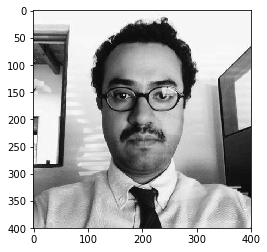

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open("/Users/alex/PropedeuticoDataScience2017/foto.jpg")
im = im.convert('LA')
col,ren =  im.size
data = np.zeros((ren*col, 5))
mat = np.array(list(im.getdata(band=0)), float)
mat.shape = (im.size[1], im.size[0])
mat = np.matrix(mat)
plt.imshow(mat, cmap='gray')
plt.show()

Realizo la SVD de la matriz que representa la imagen:

In [7]:
U, sigma, V = np.linalg.svd(mat)

Reviso la descomposición. Es decir: $$mat = U \Sigma V^T$$

In [14]:
mat

matrix([[ 240.,  242.,  244., ...,  242.,  242.,  242.],
        [ 240.,  242.,  244., ...,  242.,  242.,  242.],
        [ 240.,  242.,  244., ...,  242.,  242.,  242.],
        ..., 
        [ 170.,  181.,  186., ...,  240.,  235.,  221.],
        [ 167.,  175.,  179., ...,  238.,  229.,  212.],
        [ 169.,  176.,  178., ...,  236.,  225.,  205.]])

In [15]:
np.matrix(U)*np.diag(sigma)*np.matrix(V)

matrix([[ 240.,  242.,  244., ...,  242.,  242.,  242.],
        [ 240.,  242.,  244., ...,  242.,  242.,  242.],
        [ 240.,  242.,  244., ...,  242.,  242.,  242.],
        ..., 
        [ 170.,  181.,  186., ...,  240.,  235.,  221.],
        [ 167.,  175.,  179., ...,  238.,  229.,  212.],
        [ 169.,  176.,  178., ...,  236.,  225.,  205.]])

Utilizo la descomposicón SVD para dar una aproximación de grado k de la imagen:

Por ejemplo, si $k=3$

In [24]:
np.matrix(U[:, :15]) * np.diag(sigma[:15]) * np.matrix(V[:15, :])

matrix([[ 246.89239312,  248.25420525,  249.56101329, ...,  232.11343037,
          230.83316037,  229.64083456],
        [ 246.88852862,  248.2498165 ,  249.55603897, ...,  232.10805515,
          230.82740151,  229.6339797 ],
        [ 246.95772032,  248.34246466,  249.64885579, ...,  232.16057554,
          230.88074578,  229.69069363],
        ..., 
        [ 176.24764306,  185.48349379,  187.07078353, ...,  234.19251019,
          234.58315081,  232.66890281],
        [ 174.80805835,  183.719161  ,  185.29481524, ...,  230.0982548 ,
          230.41663585,  228.4611675 ],
        [ 175.91528899,  184.63375229,  186.24633501, ...,  227.61250468,
          228.02326217,  226.2593036 ]])

A continuación muestro varios valores de aproximación a la imagen:

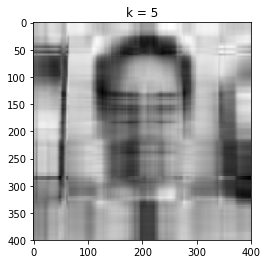

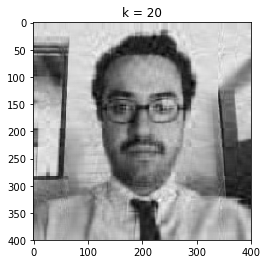

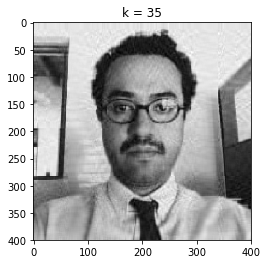

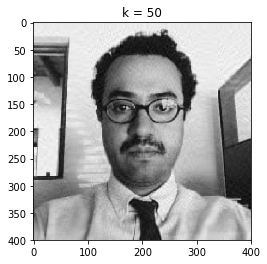

In [30]:
for i in range(5, 60, 15):
    red = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(red, cmap='gray')
    title = "k = "+ str(i) 
    plt.title(title)
    plt.show()

Resulta interesante notar que con $k=50$ la imagen ya se asemeja bastante a la original.

Este proyecto tiene que ver con compresión de imágenes pues al utilizar los primeros $k$ vectores singulares para la nueva imagen se está ocupando menos espacio con respecto a la imagen original. Como mencionado con antelación, considerando sólo los primeros 50 vaectores propios, la imagen describe relativamente bien a la original.

#### 2.- Aplicaciones de la pseudoinversa y sistemas de ecuaciones

Función que dada cualquier matriz devuelve la pseudoinversa:

In [76]:
def pseudo(A):
    if isinstance(A,np.ndarray) or isinstance(A,np.generic):
        U,sigma,V=np.linalg.svd(A) 
        sigma_inv=np.zeros(sigma.shape)
        for i in range(len(sigma)):
            if sigma[i]==0:
                sigma_inv[i]=0
            else:
                sigma_inv[i]=1/sigma[i]
        if A.shape[0]==A.shape[1]:
            return np.transpose(np.matrix(V))*np.diag(sigma_inv)*np.transpose(np.matrix(U))
        elif A.shape[0] < A.shape[1]:
            ncol=sigma.shape[0]
            nren=A.shape[1]-A.shape[0]
            return np.transpose(np.matrix(V))*np.append(np.diag(sigma_inv),np.zeros((nren,ncol)),axis=0)*np.transpose(np.matrix(U))
        else:
            nren=np.absolute(A.shape[1]-A.shape[0])
            return np.transpose(np.matrix(V))*np.append(np.diag(sigma_inv),np.zeros((V.shape[1],nren)),1)*np.transpose(np.matrix(U))
    else:
        return NotImplemented

Vamos a corrobar que para la siguientes matriz la función de los mismos resultados que la de Numpy:

In [77]:
A = np.matrix([[-1,2,2],[3,3,2],[5,4,1]])

In [78]:
pseudo(A)

matrix([[-0.38461538,  0.46153846, -0.15384615],
        [ 0.53846154, -0.84615385,  0.61538462],
        [-0.23076923,  1.07692308, -0.69230769]])

In [79]:
np.linalg.pinv(A)

matrix([[-0.38461538,  0.46153846, -0.15384615],
        [ 0.53846154, -0.84615385,  0.61538462],
        [-0.23076923,  1.07692308, -0.69230769]])

Función que resuelve sistemas de ecuaciones de la forma $Ax=b$ usando la pseudoinversa:

In [80]:
def solve_pseudo(A,b):
    if isinstance(A,(np.ndarray,np.generic)):
        return np.matrix(pseudo(A))*np.matrix(b)
    else:
        return NotImplemented

In [81]:
A=np.matrix([[1,1],[0,0]])
b1=np.array([[1],[0]])
b2=np.array([[3],[0]])
b3=np.array([[1],[1]])

In [82]:
solve_pseudo(A,b1)

matrix([[ 0.5],
        [ 0.5]])

In [83]:
solve_pseudo(A,b2)


matrix([[ 1.5],
        [ 1.5]])

In [84]:
solve_pseudo(A,b3)

matrix([[ 0.5],
        [ 0.5]])

En este ejemplo estamos utilizando una matriz cuadrada que no es invertible, por lo que la pseudoinversa no tiene todas las propiedades de una inversa. 

a) En nuestro ejemplo, la imagen es $(x+y,0)$ con $x,y\in \Re$. En el caso en que $b$ está en la imagen al resolver el sistema utilizando la pseudoinversa nos da una de la infinidad de soluciones posibles. 

En el caso que $b$ no está en la imagen, pese a que no existe una solución, al resolver el sistema con la pseudoinversa obtenemos un resultado similar al que se obtiene cuando está en la imagen.

b) La solución no es única, hay una infinidad de soluciones. La solución al sistema que se obtiene en este ejemplo usando la pseudoinversa es de la forma $x=y$, sin importar que $b$ se encuentre o no en la imagen.

In [86]:
A=np.matrix([[1,1],[0,1e-32]])
b1=np.array([[1],[0]])
b2=np.array([[3],[0]])
b3=np.array([[1],[1]])

In [88]:
solve_pseudo(A,b1)


matrix([[  1.00000000e+00],
        [ -1.11022302e-16]])

In [89]:
solve_pseudo(A,b2)

matrix([[  3.00000000e+00],
        [ -3.33066907e-16]])

In [90]:
solve_pseudo(A,b3)

matrix([[ -1.00000000e+32],
        [  1.00000000e+32]])

c) En este caso la solución aparentemente sí es única. Los valores de $x$ obtenidos de resolver el sitema $Ax=b$ son distintos en todo los casos, con respecto al punto anterior. 

#### 3.- Pandas, data frames y mínimos cuadrados

Script que lee el archivo study_vs_sat.csv y lo almacena como un data frame de pandas:

In [95]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/mauriciogtec/PropedeuticoDataScience2017/master/Tarea/study_vs_sat.csv')

In [96]:
df.head()

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410


El problema de optimización que queremos resolver es minimizar los residuos al cuadrado; es decir, encontrar $\alpha$ y $\beta$ que resuelvan el siguiente problema:

$$ \displaystyle{\min_{\alpha , \beta}} \sum_{i=1}^{20} (sat score_i - \alpha - \beta*study hours_i)^2$$

Por facilidad en la escritura, definimos $y_i=satscore_i$ y $x_i=studyhours_i$, entonces la función a minimizar sería la siguiente: $ P(\alpha, \beta)= \sum_{i=1}^{20} (y_i - \alpha - \beta x_i)^2$.

El gradiente de la función es el siguiente: $$\nabla P(\alpha,\beta)=\left( \frac{\partial}{\partial \alpha}P(\alpha,\beta),\frac{\partial}{\partial \beta}P(\alpha,\beta)\right) = \left(- \sum_{i=1}^{20} 2(y_i - \alpha - \beta x_i),\sum_{i=1}^{20} 2(y_i - \alpha - \beta x_i)x_i\right)$$

La solución al problema de minimizar los residuos al cuadrado es el siguiente:

In [100]:
x=df.iloc[:,0]
y=df.iloc[:,1]
x_barra=sum(x)/len(x)
y_barra=sum(y)/len(y)
beta=sum((x-x_barra)*(y-y_barra))/sum((x-x_barra)*(x-x_barra))
alpha=y_barra - beta*x_barra

In [98]:
alpha

353.16487949888528

In [99]:
beta

25.32646777789574

Función que recibe valores de alpha, beta y el vector sat_score y devuelva un vector array de numpy de predicciones alpha + beta*study_hours_i, con un valor por cada individuo (Nota: me parece que lo que se busca en este punto, es programar una función para generar las predicciones de sat_score para cada individuo en funcion de alpha, beta y study_hours):

In [101]:
def predict(alpha,beta,x):
    return alpha + beta*x

In [102]:
predict(alpha,beta,x)

0     454.470751
1     581.103089
2     606.429557
3     707.735428
4     454.470751
5     530.450154
6     657.082493
7     910.347171
8     378.491347
9     429.144283
10    555.776622
11    631.756025
12    479.797218
13    505.123686
14    606.429557
15    631.756025
16    758.388364
17    682.408961
18    682.408961
19    606.429557
Name: study_hours, dtype: float64

Numpy array $X$ de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours. Observemos que X*[alpha,beta] nos devuelve alpha + beta*study_hours_i en cada entrada y que entonces el problema se vuelve sat_score ~ X*[alpha,beta]:

In [118]:
X=np.c_[np.ones(20),np.array(x)]
print(X*np.matrix([[alpha],[beta]]))

[[ 454.47075061]
 [ 581.1030895 ]
 [ 606.42955728]
 [ 707.73542839]
 [ 454.47075061]
 [ 530.45015394]
 [ 657.08249283]
 [ 910.34717061]
 [ 378.49134728]
 [ 429.14428283]
 [ 555.77662172]
 [ 631.75602506]
 [ 479.79721839]
 [ 505.12368617]
 [ 606.42955728]
 [ 631.75602506]
 [ 758.38836395]
 [ 682.40896061]
 [ 682.40896061]
 [ 606.42955728]]


Calculamos la pseudoinversa $X^+$ de $X$ y $X^+*$sat_score para obtener alpha y beta soluciones:

In [107]:
X_inv=pseudo(X)
print(X_inv*np.transpose(np.matrix(y)))

[[ 353.1648795 ]
 [  25.32646778]]


Comparamos, la solución anterior con la de la fórmula directa de la solución exacta: $$(\alpha,\beta)=(X^TX)^{-1}X^T satscores$$

In [108]:
(alpha2,beta2)=np.matmul(np.linalg.inv((np.matmul(X.T,X))),np.matmul(X.T,y))

In [109]:
alpha2


353.16487949888506

In [110]:
beta2

25.326467777895687

Por lo tanto, la solución de la fórmula directa es la misma a la que obtuvimos con la pseudoinversa.

#### 4.- Visualizar predicciones con alpha y beta solución contra valores reales de sat_score utilizando Matplotlib

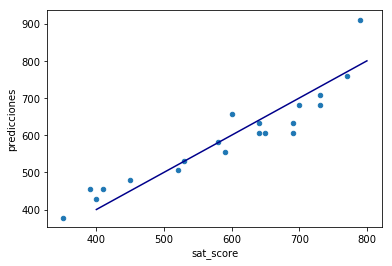

In [116]:
import matplotlib.pyplot as plt 
d = {'sat_score' : y,'predicciones' : alpha + beta*x}
df = pd.DataFrame(d)
df.plot(kind='scatter', x='sat_score', y='predicciones')
plt.plot( [400,800],[400,800], color='DarkBlue' );
plt.show()

#### 5.- Método descenso gradiente

In [119]:
def descenso_gradiente (alpha, x, y, num_iter):
    n = x.shape[0] 
    theta = np.ones(2)
    for i in range(0,num_iter):
        hipotesis = np.dot(x, theta)
        perdida = hipotesis - y
        J = np.sum(perdida**2) / (2*n) 
        gradiente = np.dot(x.transpose(),perdida) / n
        theta = theta - alpha * gradiente 
    return theta


In [122]:
alpha = 0.014
X=np.c_[np.ones(20),np.array(x)]
theta = descenso_gradiente(alpha, X, y, 2000)


In [123]:
theta

array([ 352.12295772,   25.41387826])

Probando con distintos learning rates:

In [124]:
alpha = 0.015
X=np.c_[np.ones(20),np.array(x)]
theta = descenso_gradiente(alpha, X, y, 2000)

In [125]:
theta


array([ 352.47731149,   25.38415028])

In [126]:
alpha = 0.016
X=np.c_[np.ones(20),np.array(x)]
theta = descenso_gradiente(alpha, X, y, 2000)

In [127]:
theta


array([ 352.71119005,   25.36452938])

In [128]:
alpha = 0.017
X=np.c_[np.ones(20),np.array(x)]
theta = descenso_gradiente(alpha, X, y, 2000)

In [129]:
theta


array([ 352.86553991,   25.35158043])

En conclusión, se pudo constatar que el método descenso gradiente aproxima muy bien los valores de alpha y beta.